<a href="https://colab.research.google.com/github/humzkhan/CSC420A1/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1
### CSC420 - Winter 2025

**Humzah Khan**



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import requests
from google.colab.patches import cv2_imshow

Grab image

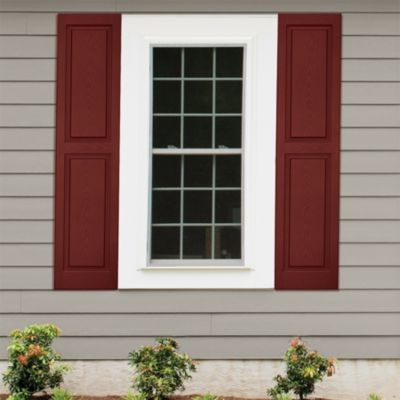

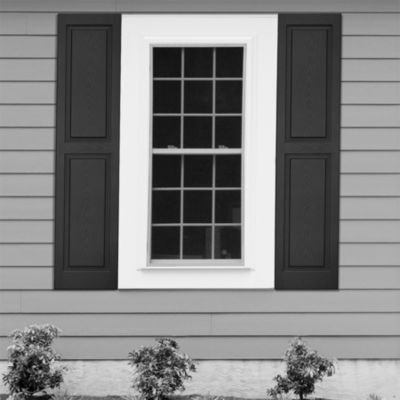

In [59]:
img_window = cv2.imread('window.jpeg')
cv2_imshow(img_window)

gray_window = cv2.cvtColor(img_window, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_window)

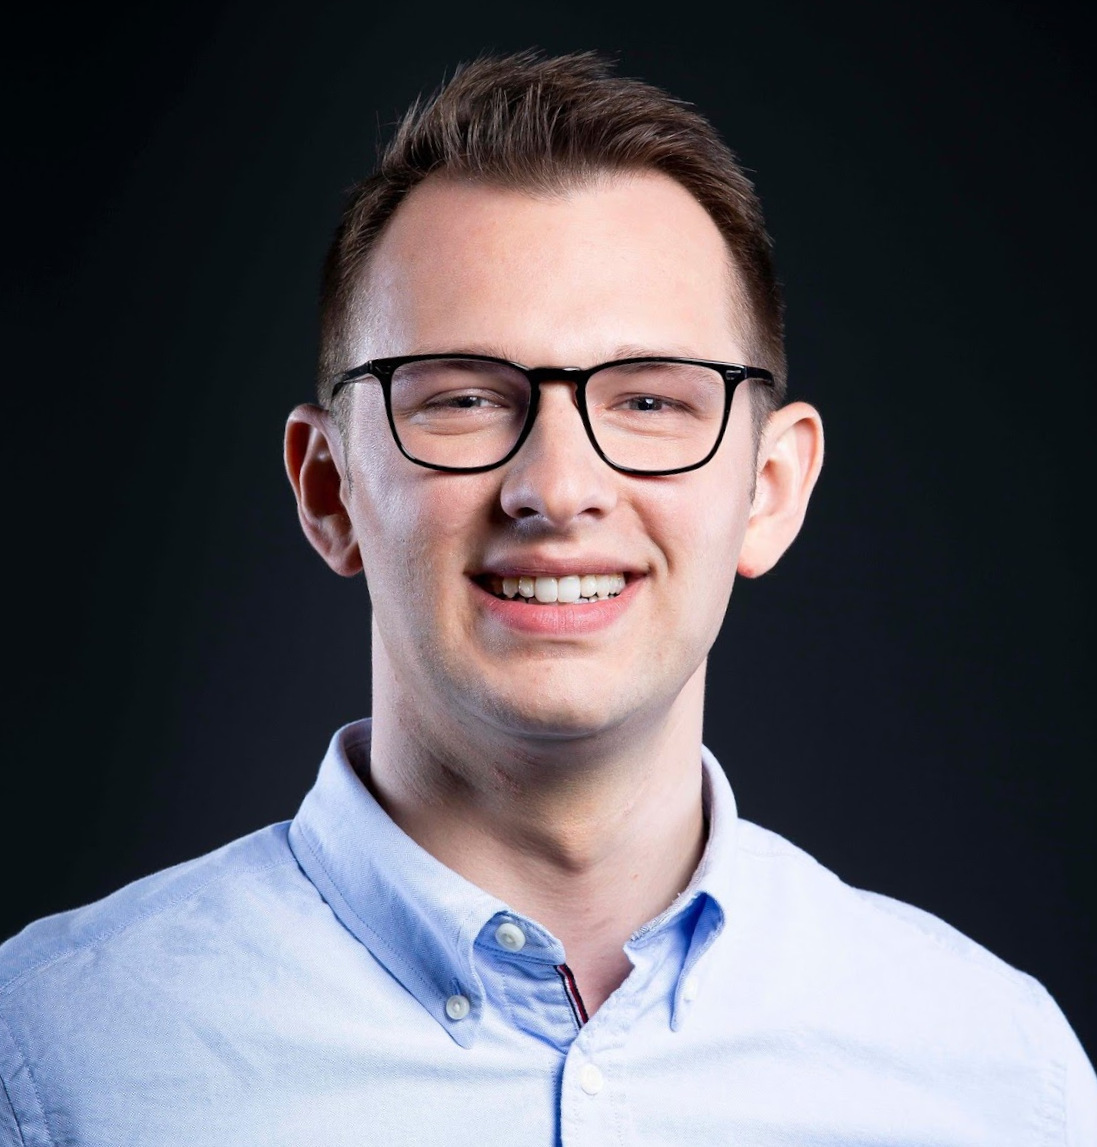

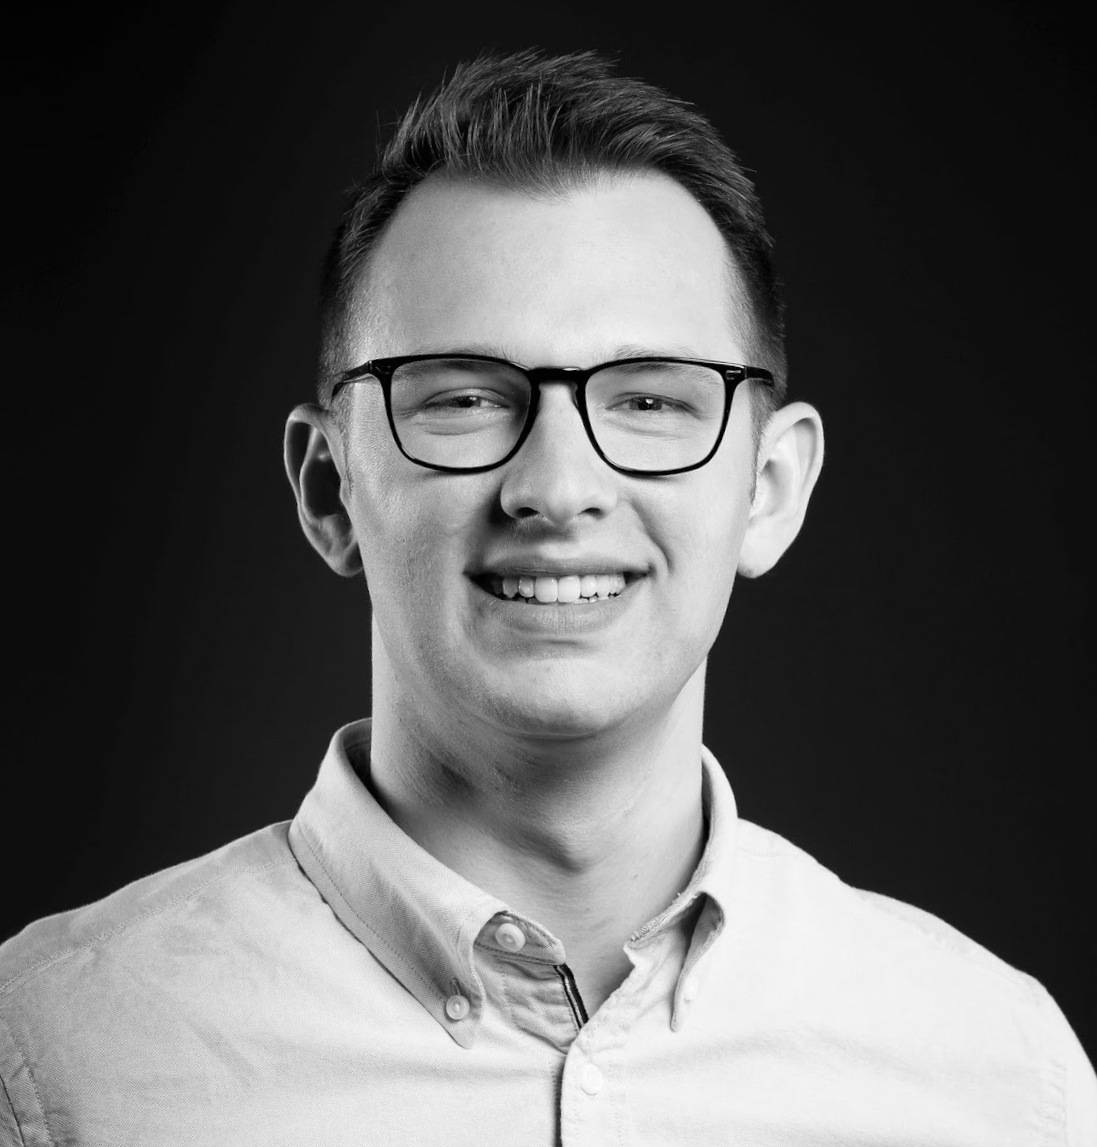

In [60]:
img = cv2.imread('prof_pic.jpeg')
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

(None, [], [])

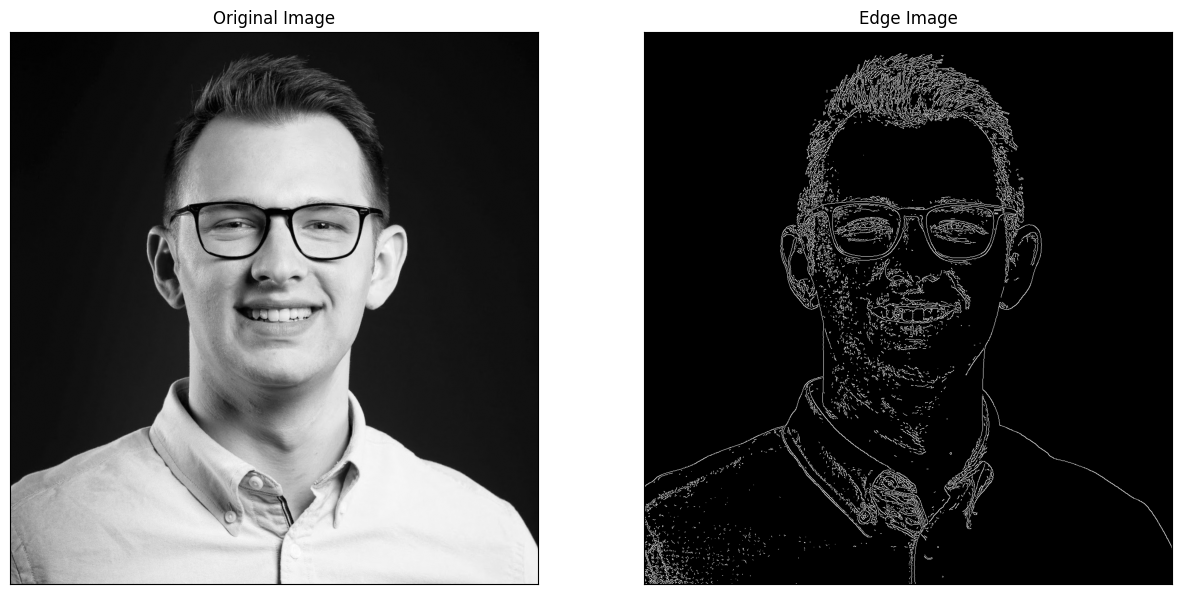

In [46]:
edges = cv2.Canny(gray, threshold1=75, threshold2=100)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray, cmap = 'gray')
ax1.title.set_text('Original Image'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(edges,cmap = 'gray')
ax2.title.set_text('Edge Image'), ax2.set_xticks([]), ax2.set_yticks([])

### Canny Edge Detector

Testing Gaussian Noise lvls

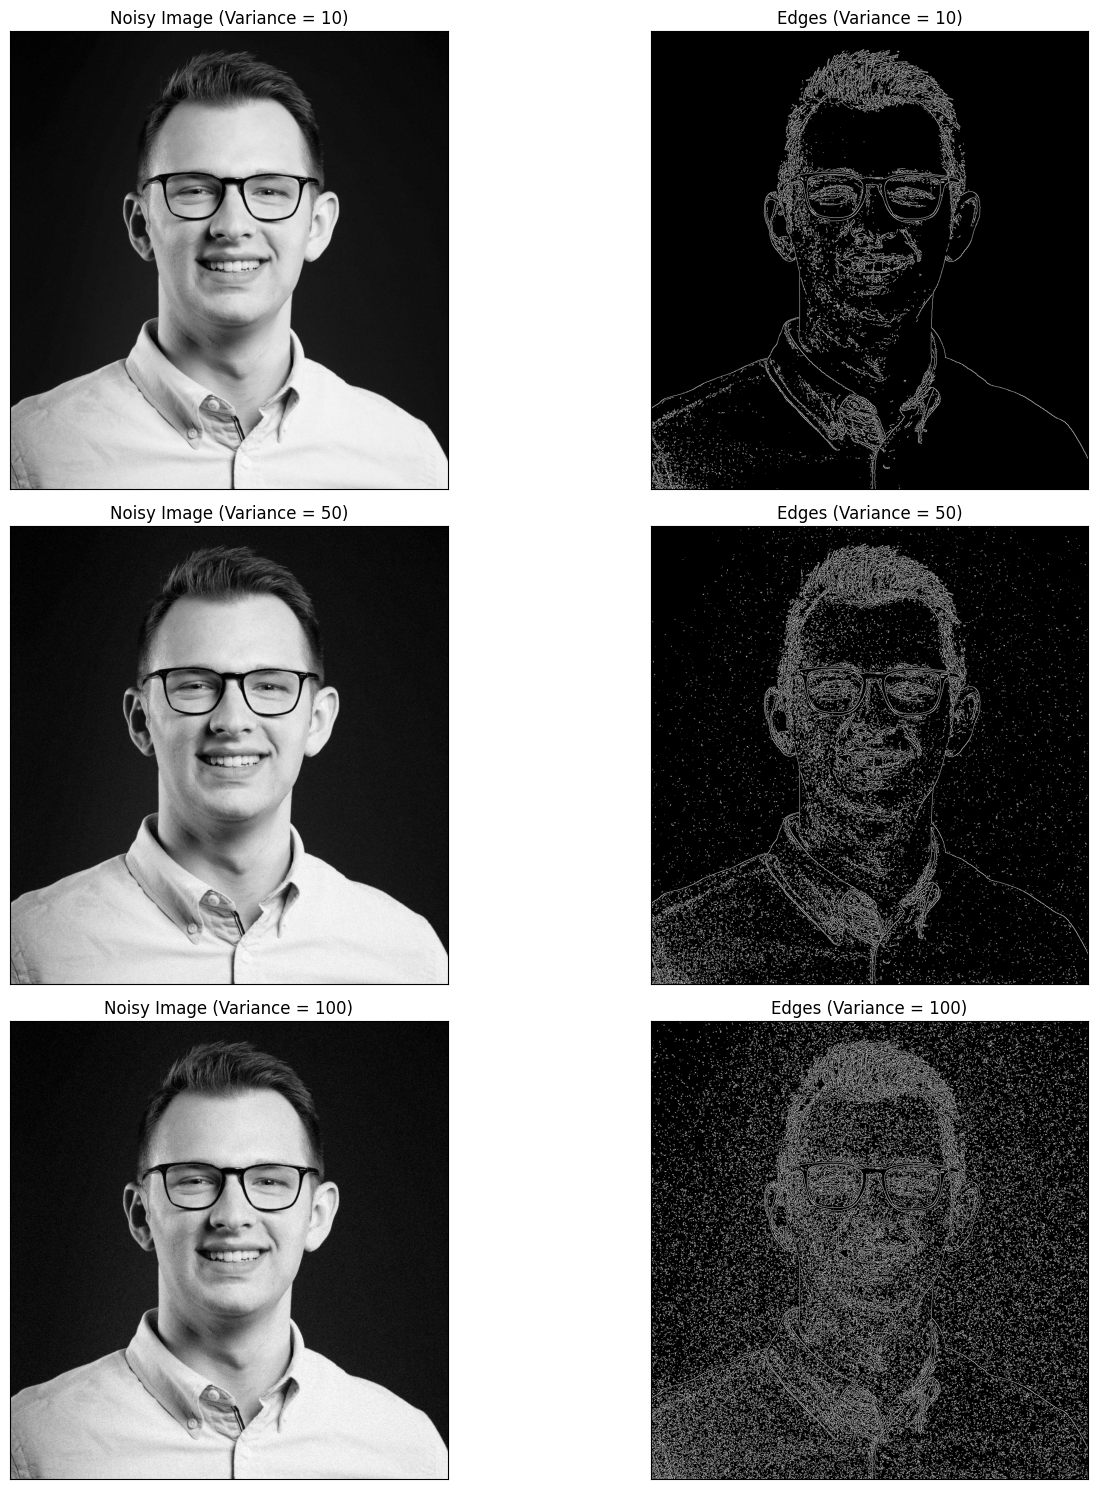

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, variance=25):
    stddev = np.sqrt(variance)  # Standard deviation
    noise = np.random.normal(mean, stddev, image.shape).astype(np.float32)
    noisy_image = image + noise
    # Clip pixel values to be within the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Define noise variances
noise_variances = [10, 50, 100]  # Low, medium, high

# Store results
results = []

for var in noise_variances:
    # Add Gaussian noise
    noisy_image = add_gaussian_noise(gray, variance=var)

    # Apply Canny edge detector
    edges = cv2.Canny(noisy_image, threshold1=75, threshold2=100)

    # Store noisy image and edges
    results.append((noisy_image, edges))

# Plot original and noisy images with their edges
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (noisy_image, edges) in enumerate(results):
    axes[i, 0].imshow(noisy_image, cmap='gray')
    axes[i, 0].title.set_text(f'Noisy Image (Variance = {noise_variances[i]})')
    axes[i, 0].set_xticks([]), axes[i, 0].set_yticks([])

    axes[i, 1].imshow(edges, cmap='gray')
    axes[i, 1].title.set_text(f'Edges (Variance = {noise_variances[i]})')
    axes[i, 1].set_xticks([]), axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()


The **Canny edge detector** is a multi-stage algorithm for detecting edges in an image by identifying areas of rapid intensity change. It first applies Gaussian smoothing to reduce noise, computes image gradients to find potential edges, applies non-maximum suppression to thin the edges, and uses double thresholding to identify and link strong and weak edges. **Gaussian noise**, in contrast, refers to random variations in pixel intensities modeled by a normal distribution, where the mean represents the average noise level (typically zero), and the **variance** measures the spread or intensity of the noise. A higher noise variance results in greater random fluctuations in pixel values. When Gaussian noise is added to an image, the edge detector may misinterpret these noisy pixels as areas of high gradient, leading to false edges. As observed in the results, the image with **low noise variance** retains the clearest and most accurate edges, closely resembling the original image. However, as noise variance increases, more noisy pixels are falsely detected as edges, creating a "sprinkled" effect of false positives, which aligns with our expectations about the sensitivity of the Canny detector to noise.

### Edge Detection

Gaussian Blurring

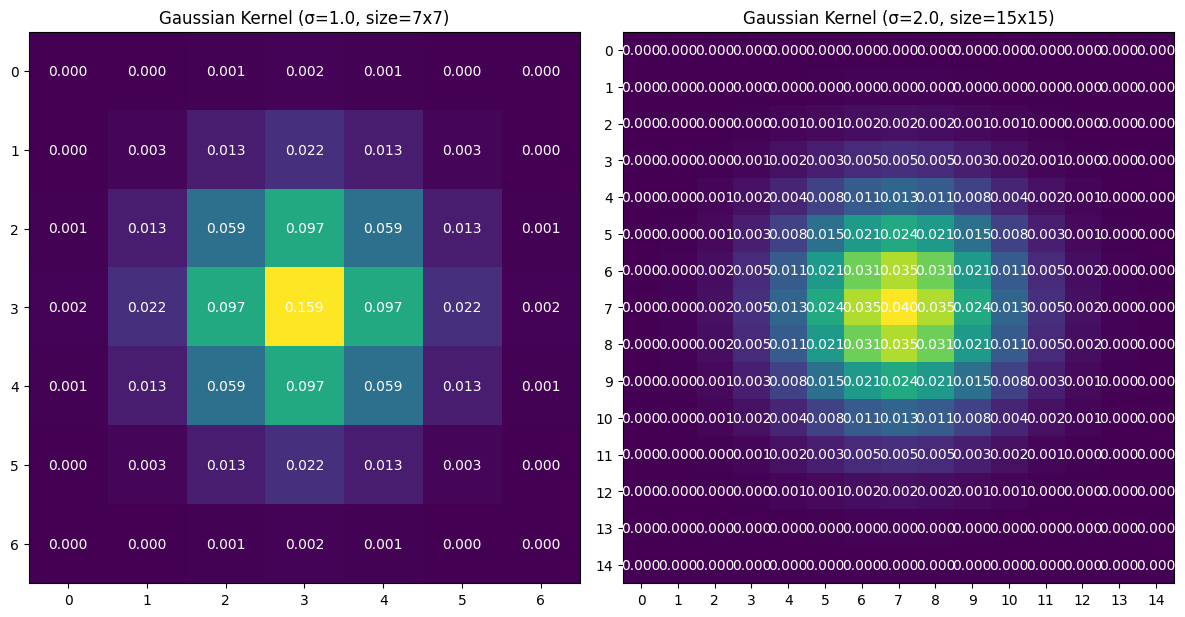

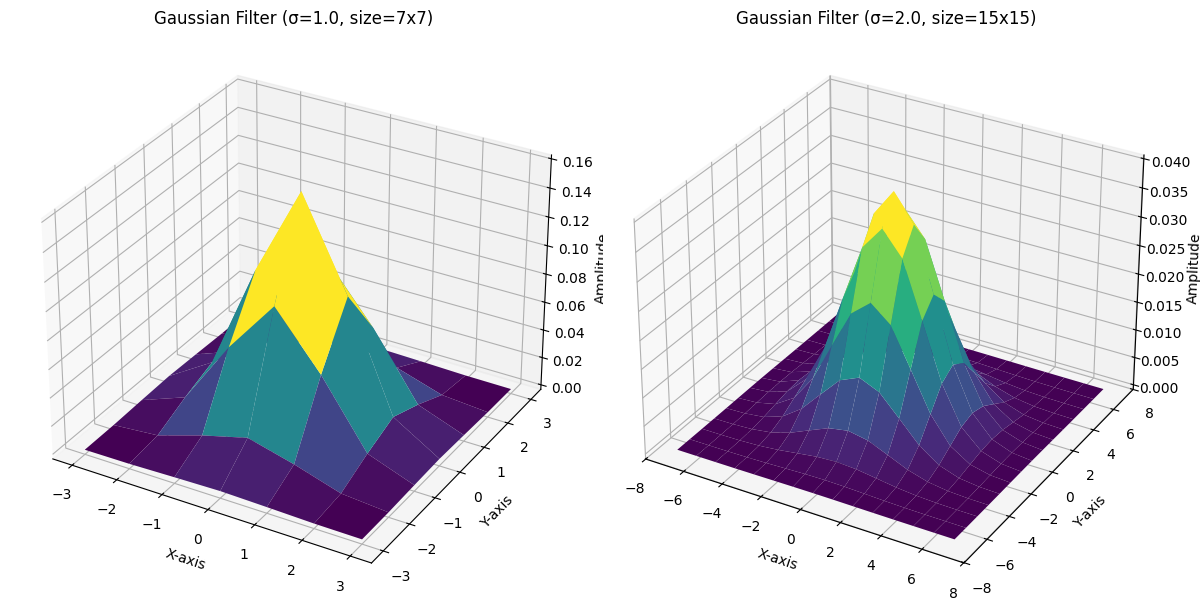

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a 2D Gaussian matrix
def generate_gaussian(size, sigma):
    """
    Generate a 2D Gaussian filter.

    Parameters:
        size (int): Size of the filter (size x size).
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        np.ndarray: 2D Gaussian filter.
    """
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Compute the Gaussian function
    gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the filter
    gaussian /= gaussian.sum()
    return gaussian

# Generate 2D Gaussian matrices for two choices of σ and size
sigma1, size1 = 1.0, 7
sigma2, size2 = 2.0, 15

gaussian1 = generate_gaussian(size1, sigma1)
gaussian2 = generate_gaussian(size2, sigma2)

# Display the Gaussian kernels as 2D grids with values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first Gaussian kernel
axes[0].imshow(gaussian1, cmap='viridis')
axes[0].set_title(f'Gaussian Kernel (σ={sigma1}, size={size1}x{size1})')
axes[0].set_xticks(range(size1))
axes[0].set_yticks(range(size1))

# Annotate the grid with values
for i in range(size1):
    for j in range(size1):
        axes[0].text(j, i, f"{gaussian1[i, j]:.3f}", ha='center', va='center', color='white')

# Plot the second Gaussian kernel
axes[1].imshow(gaussian2, cmap='viridis')
axes[1].set_title(f'Gaussian Kernel (σ={sigma2}, size={size2}x{size2})')
axes[1].set_xticks(range(size2))
axes[1].set_yticks(range(size2))

# Annotate the grid with values
for i in range(size2):
    for j in range(size2):
        axes[1].text(j, i, f"{gaussian2[i, j]:.3f}", ha='center', va='center', color='white')

plt.tight_layout()
plt.show()



# Visualize the 2D Gaussian matrices
fig = plt.figure(figsize=(12, 6))

# First Gaussian
ax1 = fig.add_subplot(121, projection='3d')
x1 = np.arange(size1) - size1 // 2
y1 = np.arange(size1) - size1 // 2
x1, y1 = np.meshgrid(x1, y1)
ax1.plot_surface(x1, y1, gaussian1, cmap='viridis', edgecolor='none')
ax1.set_title(f'Gaussian Filter (σ={sigma1}, size={size1}x{size1})')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Amplitude')

# Second Gaussian
ax2 = fig.add_subplot(122, projection='3d')
x2 = np.arange(size2) - size2 // 2
y2 = np.arange(size2) - size2 // 2
x2, y2 = np.meshgrid(x2, y2)
ax2.plot_surface(x2, y2, gaussian2, cmap='viridis', edgecolor='none')
ax2.set_title(f'Gaussian Filter (σ={sigma2}, size={size2}x{size2})')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Amplitude')

plt.tight_layout()
plt.show()


Gradient Magnitude

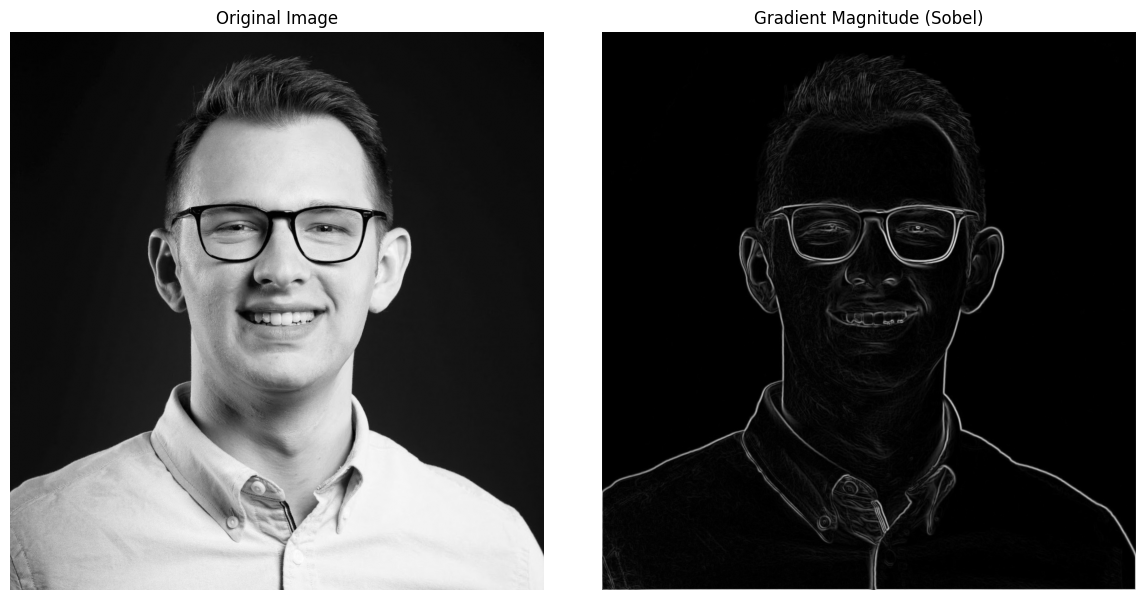

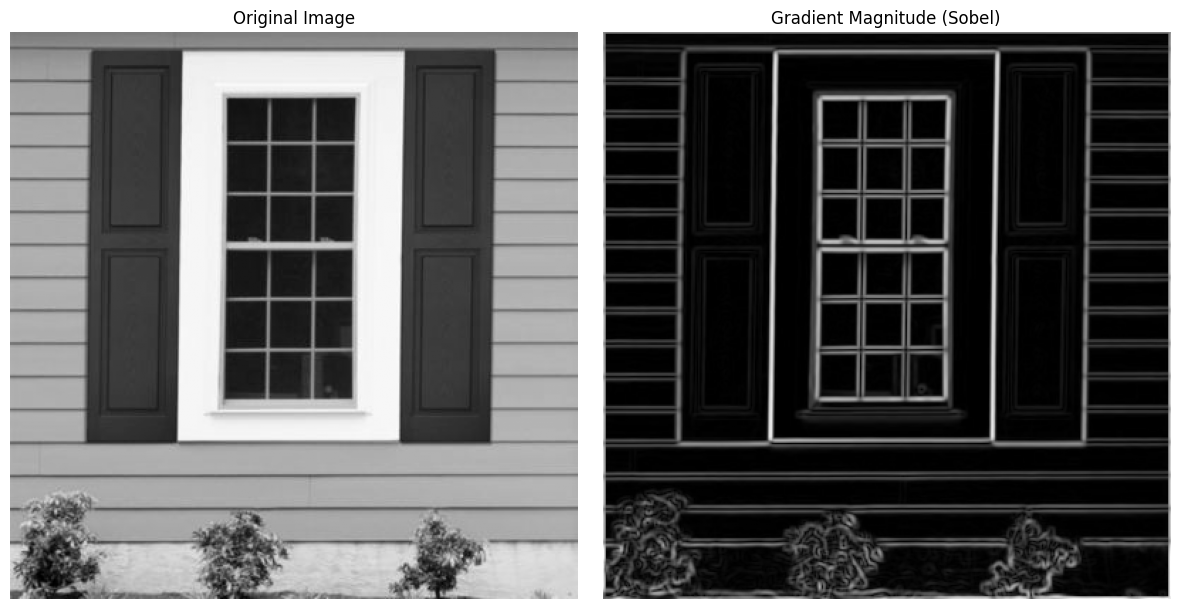

In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    """
    Perform a 2D convolution operation with padding.

    Parameters:
        image (np.ndarray): Input image.
        kernel (np.ndarray): Convolution kernel (must be odd-sized).

    Returns:
        np.ndarray: Convolved image.
    """
    # Ensure kernel has odd dimensions
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel for convolution
    output = np.zeros_like(image, dtype=float)  # Initialize the output image

    # Padding dimensions
    pad_h = kernel.shape[0] // 2
    pad_w = kernel.shape[1] // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)

    return output


# Sobel operator kernels (normalized)
sobel_x = np.array([
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [4, 2, 0, -2, -4],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2]
], dtype=float)
sobel_y = np.array([
    [2, 2, 4, 2, 2],
    [1, 1, 2, 1, 1],
    [0, 0, 0, 0, 0],
    [-1, -1, -2, -1, -1],
    [-2, -2, -4, -2, -2]
], dtype=float)

# Normalize kernels
sobel_x /= np.sum(np.abs(sobel_x))
sobel_y /= np.sum(np.abs(sobel_y))

# Sobel gradient magnitude computation
def sobel_gradient(image):
    #blurred_image = cv2.GaussianBlur(image, (5, 5), 1)  # Pre-blur image
    gx = convolve2d(image, sobel_x)
    gy = convolve2d(image, sobel_y)
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    return gradient_magnitude.astype(np.uint8)


# Compute gradient magnitude
gradient_magnitude = sobel_gradient(gray)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compute gradient magnitude
gradient_magnitude = sobel_gradient(gray_window)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_window, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()
